In [70]:
# Make the plots of a template event with different filters applied

In [71]:
## Import modules
from matplotlib import pyplot as plt
from obspy import read, UTCDateTime, Stream
from snuffler_utils import read_normal_markers
from preproc_utils import preprocess_stream
from os.path import join
from numpy import abs, amax
import pandas as pd

In [72]:
## Inputs
root = "/Volumes/OmanData/geophones_no_prefilt/data"
timewin = "2020-01-12-17-00-00"
tempname = "Example2"
phasename = "X"

begin = -0.01
end = 0.2

freqmin1 = 10.0
freqmax1 = None

freqmin2 = 10.0
freqmax2 = 150.0

In [73]:
## Read the picks of the master event
pkname = f"{phasename}picks_{tempname}.dat"
inpath = join(root, timewin, pkname)
pickdf = read_normal_markers(inpath)

In [74]:
## Read and process the waveforms using the two filtering bands
stream0 = Stream()
for stname in pickdf["station"]:
    stream0 += read(join(root, timewin, f"*{stname}*SAC"))

stream1 = preprocess_stream(stream0, freqmin1, freqmax1)
stream2 = preprocess_stream(stream0, freqmin2, freqmax2)

starttime0 = UTCDateTime(pickdf["time"].min())
starttime = starttime0 + begin
endtime = starttime0 + end

stream1.trim(starttime, endtime)
stream2.trim(starttime, endtime)

18 Trace(s) in Stream:
7F.A04..GH1 | 2020-01-12T17:23:35.352086Z - 2020-01-12T17:23:35.562086Z | 1000.0 Hz, 211 samples
7F.A04..GH2 | 2020-01-12T17:23:35.352086Z - 2020-01-12T17:23:35.562086Z | 1000.0 Hz, 211 samples
7F.A04..GHZ | 2020-01-12T17:23:35.352086Z - 2020-01-12T17:23:35.562086Z | 1000.0 Hz, 211 samples
7F.A05..GH1 | 2020-01-12T17:23:35.352086Z - 2020-01-12T17:23:35.562086Z | 1000.0 Hz, 211 samples
7F.A05..GH2 | 2020-01-12T17:23:35.352086Z - 2020-01-12T17:23:35.562086Z | 1000.0 Hz, 211 samples
7F.A05..GHZ | 2020-01-12T17:23:35.352086Z - 2020-01-12T17:23:35.562086Z | 1000.0 Hz, 211 samples
7F.A03..GH1 | 2020-01-12T17:23:35.352086Z - 2020-01-12T17:23:35.562086Z | 1000.0 Hz, 211 samples
7F.A03..GH2 | 2020-01-12T17:23:35.352086Z - 2020-01-12T17:23:35.562086Z | 1000.0 Hz, 211 samples
7F.A03..GHZ | 2020-01-12T17:23:35.352086Z - 2020-01-12T17:23:35.562086Z | 1000.0 Hz, 211 samples
7F.A02..GH1 | 2020-01-12T17:23:35.352086Z - 2020-01-12T17:23:35.562086Z | 1000.0 Hz, 211 samples
7F.A02.

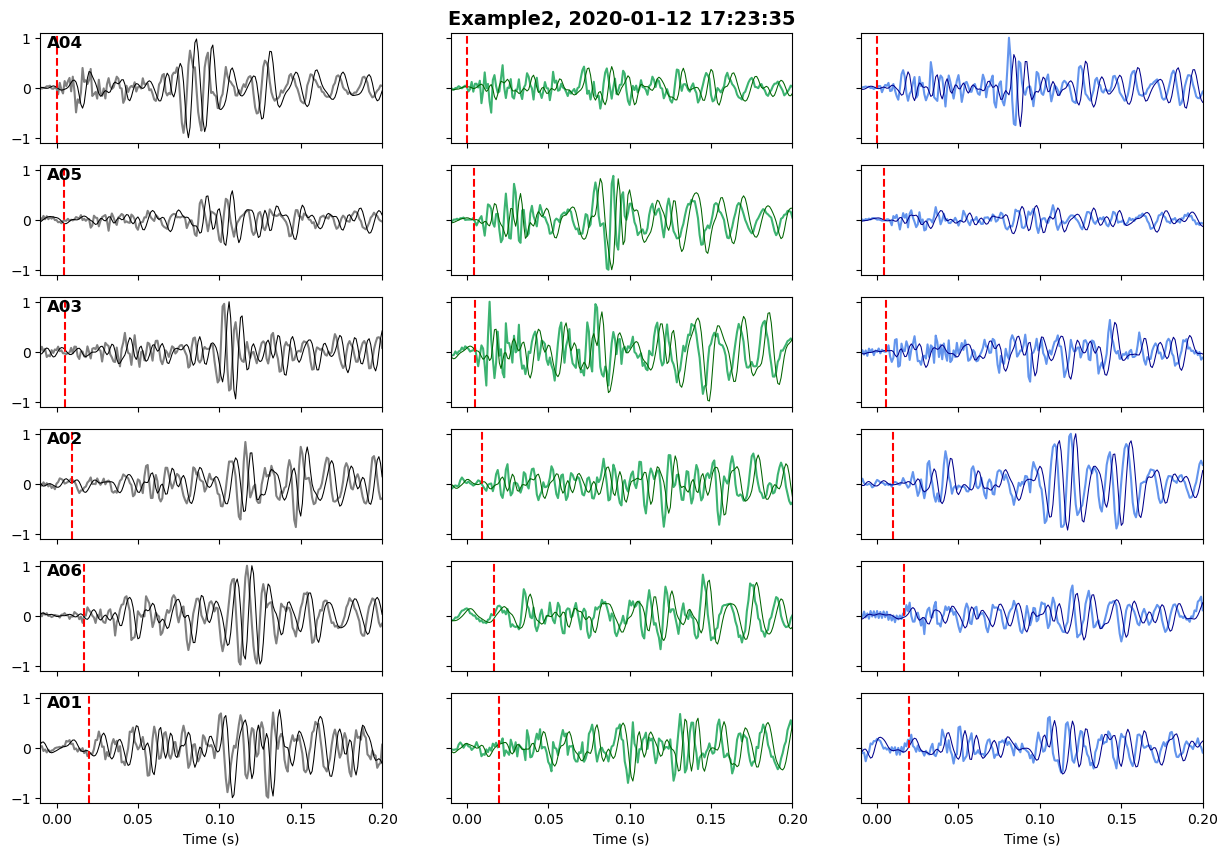

In [75]:
## Plot the waveforms
numst = len(pickdf)

fig, axes = plt.subplots(nrows=numst, ncols=3, sharex=True, sharey=True, figsize=(15, 10))

for i, row in pickdf.iterrows():
    stname = row["station"]
    pktime = UTCDateTime(row["time"])

    ### Extract and normalize the waveforms
    trace1_z = stream1.select(station=stname, channel="*Z")[0]
    trace1_1 = stream1.select(station=stname, channel="*1")[0]
    trace1_2 = stream1.select(station=stname, channel="*2")[0]

    data1_z = trace1_z.data
    data1_1 = trace1_1.data
    data1_2 = trace1_2.data

    maxamp = amax([amax(abs(data1_z)), amax(abs(data1_1)), amax(abs(data1_2))])
    data1_z  = data1_z/maxamp
    data1_1  = data1_1/maxamp
    data1_2  = data1_2/maxamp

    trace2_z = stream2.select(station=stname, channel="*Z")[0]
    trace2_1 = stream2.select(station=stname, channel="*1")[0]
    trace2_2 = stream2.select(station=stname, channel="*2")[0]

    data2_z = trace2_z.data
    data2_1 = trace2_1.data
    data2_2 = trace2_2.data

    maxamp = amax([amax(abs(data2_z)), amax(abs(data2_1)), amax(abs(data2_2))])
    data2_z  = data2_z/maxamp
    data2_1  = data2_1/maxamp
    data2_2  = data2_2/maxamp

    timeax = trace1_z.times()+begin

    ### Plot
    axes[i, 0].plot(timeax, data1_z, color="gray", linewidth=1.5)
    axes[i, 0].plot(timeax, data2_z, color="black", linewidth=0.75)

    axes[i, 1].plot(timeax, data1_1, color="mediumseagreen", linewidth=1.5)
    axes[i, 1].plot(timeax, data2_1, color="darkgreen", linewidth=0.75)

    axes[i, 2].plot(timeax, data1_2, color="cornflowerblue", linewidth=1.5)
    axes[i, 2].plot(timeax, data2_2, color="darkblue", linewidth=0.75)

    ### Annotate the axes
    axes[i, 0].text(0.02, 0.98, f"{stname}", transform=axes[i, 0].transAxes, horizontalalignment="left", verticalalignment="top", fontsize=12, fontweight="bold")

    ### Plot the P wave pick
    pick = pktime-starttime0
    axes[i, 0].axvline(pick, color="r", linestyle="--")
    axes[i, 1].axvline(pick, color="r", linestyle="--")
    axes[i, 2].axvline(pick, color="r", linestyle="--")

    ### Set the axes attributes
    if i == 0:
        timestr = starttime0.strftime("%Y-%m-%d %H:%M:%S")
        axes[i, 1].set_title(f"{tempname}, {timestr}", fontsize=14, fontweight="bold")

    axes[i, 0].set_xlim(begin, end)

    if i == numst-1:
        axes[i, 0].set_xlabel("Time (s)")
        axes[i, 1].set_xlabel("Time (s)")
        axes[i, 2].set_xlabel("Time (s)")

In [76]:
## Save the figure
if freqmax2 is None:
    outfile = f"FilterCompare_{tempname}_HighPass.png"
else:
    outfile = f"FilterCompare_{tempname}_LowPass.png"

outpath = join(root, timewin, outfile)
fig.savefig(outpath, dpi=300, bbox_inches="tight", transparent=True)